In [ ]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from doctest import testmod

In [3]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [5]:
confirmed = confirmed.set_index('Country/Region')
deaths = deaths.set_index('Country/Region')
recovered = recovered.set_index('Country/Region')

In [7]:
def prepare_data(dataset):
    data = dataset.iloc[:,3:].groupby(['Country/Region']).sum().transpose()
    data.index = pd.to_datetime(data.index)
    data = data.sort_index(ascending=True)
    data = pd.DataFrame(data)
    return data

In [9]:
def difference(dataset, interval=1):
    return dataset.apply(lambda x: x - x.shift(1))

In [11]:
def weekly_moving_average(dataset, days=7):  
    return dataset.apply(lambda x: (x + x.shift(1) + x.shift(2) + x.shift(3)
                                    + x.shift(4) + x.shift(5)+ x.shift(6))/7)

In [18]:
# Adding population data
POPULATION_DATASET = '/Users/filippawlak/API_SP.POP.TOTL_DS2_en_excel_v2_2015410.xls'
population_dataset = pd.read_excel(POPULATION_DATASET, skiprows=3)
population = pd.DataFrame(population_dataset[['Country Name','2019']]).set_index('Country Name')
population.head()

,2019
Country Name,
Aruba,106314.0
Afghanistan,38041754.0
Angola,31825295.0
Albania,2854191.0
Andorra,77142.0


In [20]:
country_dict = {
    "Czechia" : "Czech Republic",
    "Slovakia" : "Slovak Republic",
}
def cases_per_100k(df):
    df_new = pd.DataFrame()
    for country in df:
        if country in country_dict:
            country2 = country_dict[country]
            country_population = population.loc[country2][0]
        else:
            country_population = population.loc[country][0]
        df_new[country] = df[country].apply(lambda x: x/country_population * 100000)
    return df_new
        
    

In [29]:
def weekly_difference(dataset, days=7):  
    return dataset.apply(lambda x: (x - x.shift(7))/x.shift(7)*100)

In [30]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = difference(prepare_data(confirmed))[countries].tail(20)
data

Country/Region,Germany,Poland,Spain,Italy,Czechia,Portugal,Slovakia
2021-02-17,9598.0,8699.0,10829.0,12066.0,12668.0,2324.0,3168.0
2021-02-18,9845.0,9074.0,14515.0,13755.0,10930.0,1944.0,2555.0
2021-02-19,9050.0,8772.0,11435.0,15470.0,11705.0,1940.0,2333.0
2021-02-20,7162.0,8509.0,0.0,14914.0,11364.0,1570.0,2705.0
2021-02-21,6094.0,7040.0,0.0,13450.0,6838.0,1186.0,1686.0
2021-02-22,4984.0,3891.0,20849.0,9617.0,4021.0,549.0,649.0
2021-02-23,5764.0,6304.0,7461.0,13299.0,11311.0,1032.0,1998.0
2021-02-24,10774.0,12147.0,9212.0,16402.0,15861.0,1480.0,3547.0
2021-02-25,11032.0,12143.0,9568.0,19871.0,13816.0,1160.0,2438.0
2021-02-26,9437.0,11536.0,8341.0,20488.0,14612.0,1027.0,2645.0


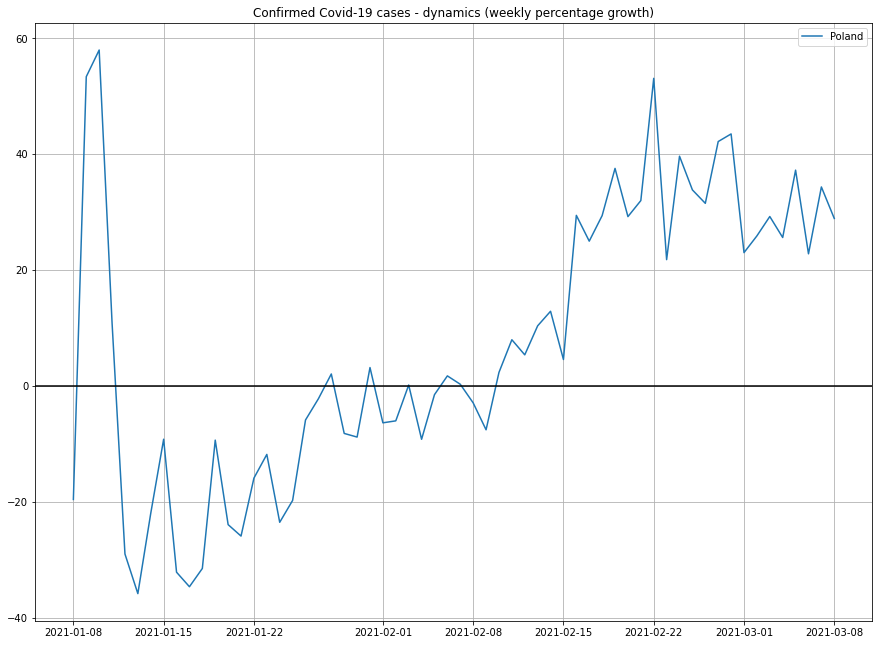

In [49]:
# Confirmed cases weekly growth 

countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - dynamics (weekly percentage growth)')
plt.plot(data)
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend(data.columns)
plt.show()


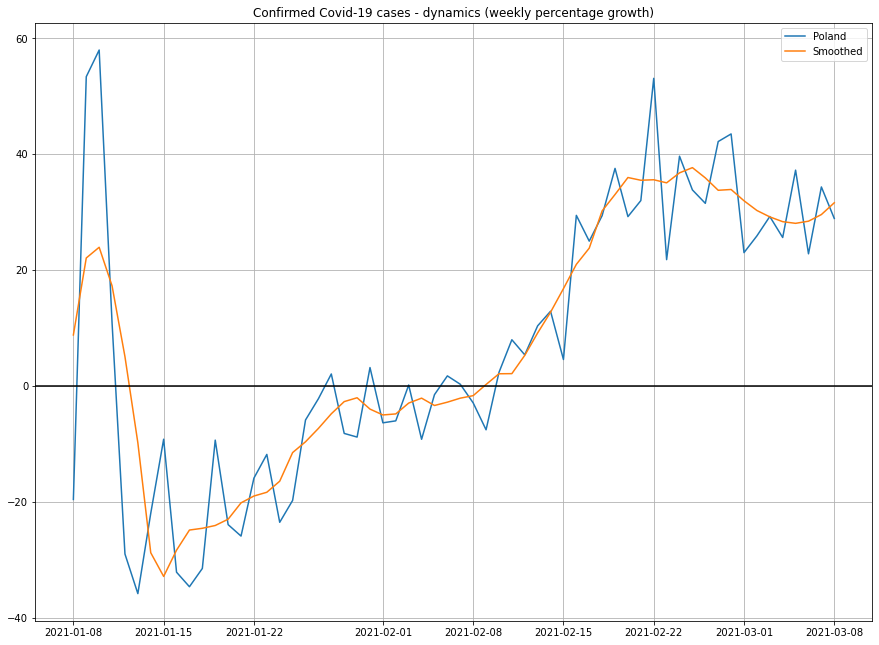

In [50]:
countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
smoothed_data = savgol_filter(data['Poland'], 11, 3) # window size, polynomial order 3

plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - dynamics (weekly percentage growth)')
plt.plot(data.index, data['Poland'], label='Poland')
plt.plot(data.index, smoothed_data, label='Smoothed')
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend()
plt.show()

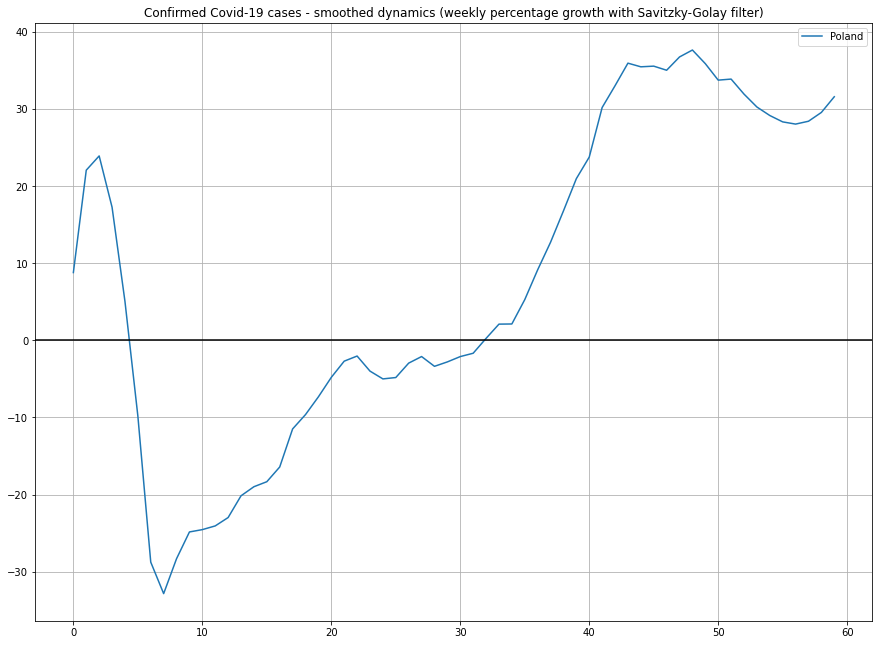

In [33]:
from scipy.signal import savgol_filter
countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)

smoothed_data = savgol_filter(data['Poland'], 11, 3) # window size 11, polynomial order 3

plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter)')
plt.plot(smoothed_data)
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend(data.columns)
plt.show()


In [37]:
from scipy.signal import savgol_filter
def smoothed_data(dataset, window_size=11, polynomial_order=3):
    df_new = pd.DataFrame(index=dataset.index)
    for country in dataset.columns:
        df_new[country] = savgol_filter(dataset[country], window_size, polynomial_order)
    return df_new

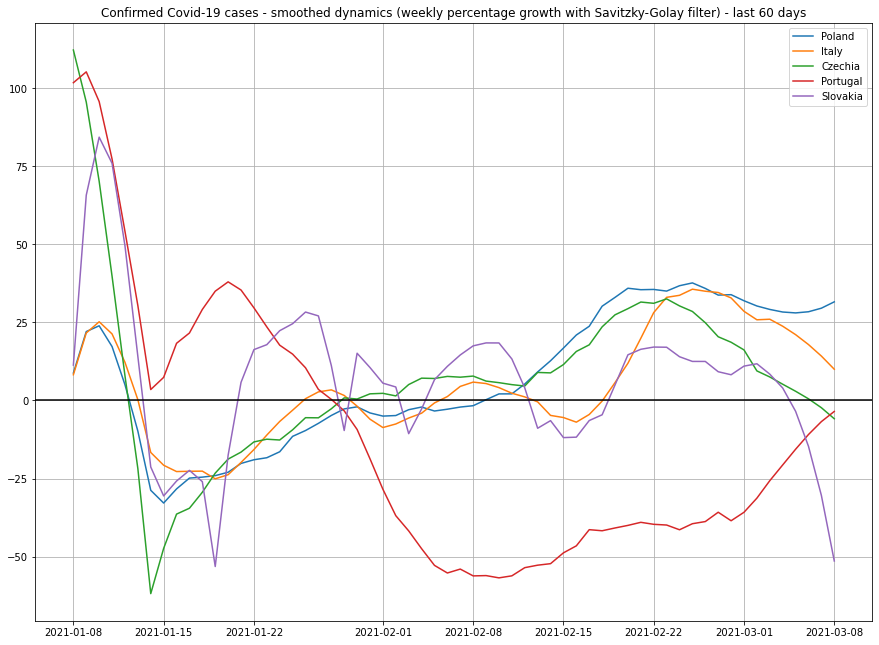

In [40]:
countries = ['Poland', 'Italy', 'Czechia', 'Portugal', 'Slovakia']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
smooth_confirmed = smoothed_data(data)
plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter) - last 60 days')
plt.plot(smooth_confirmed)
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend(smooth_confirmed.columns)
plt.show()

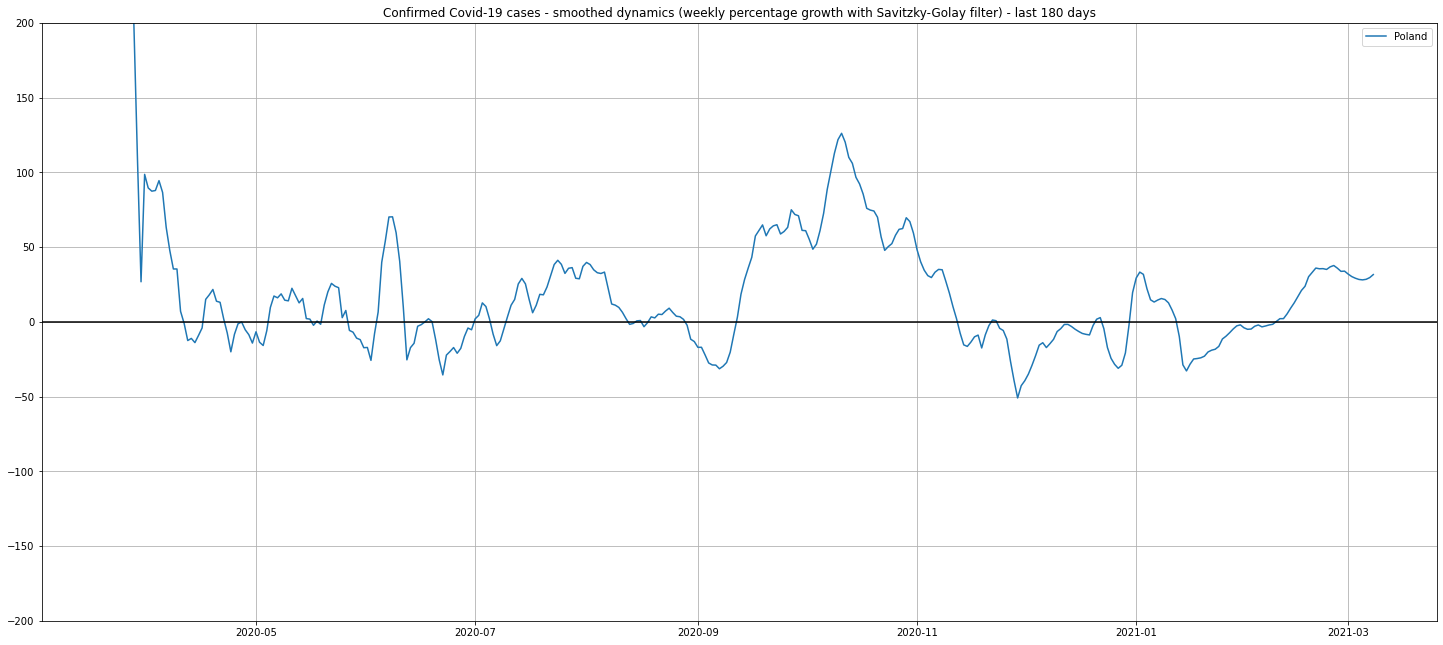

In [41]:
countries = ['Poland']
# countries = ['Poland', 'Italy', 'Czechia', 'Portugal', 'Slovakia']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(360)
smooth_confirmed = smoothed_data(data)
plt.figure(figsize=(25,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter) - last 180 days')
plt.plot(smooth_confirmed)
plt.axhline(0, color="black", linestyle="-")
plt.ylim(-200, 200)
plt.grid(True)
plt.legend(smooth_confirmed.columns)
plt.show()

In [42]:
VACCINATION = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'

In [43]:
vaccination = pd.read_csv(VACCINATION)
vaccination

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5728,Zimbabwe,ZWE,2021-03-04,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0
5729,Zimbabwe,ZWE,2021-03-05,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0
5730,Zimbabwe,ZWE,2021-03-06,32014.0,32014.0,NaN,689.0,2330.0,0.22,0.22,NaN,157.0
5731,Zimbabwe,ZWE,2021-03-07,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0


In [44]:
vaccination[vaccination['location']=='World']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5628,World,OWID_WRL,2020-12-13,86465.0,86465.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
5629,World,OWID_WRL,2020-12-14,86470.0,86465.0,NaN,5.0,5.0,0.00,0.00,NaN,0.0
5630,World,OWID_WRL,2020-12-15,1615688.0,114965.0,NaN,1529218.0,764612.0,0.02,0.00,NaN,98.0
5631,World,OWID_WRL,2020-12-16,1617988.0,114965.0,NaN,2300.0,510508.0,0.02,0.00,NaN,65.0
5632,World,OWID_WRL,2020-12-17,1622167.0,114965.0,NaN,4179.0,383926.0,0.02,0.00,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5709,World,OWID_WRL,2021-03-04,285487132.0,167999023.0,61102711.0,8341473.0,8073207.0,3.66,2.16,0.78,1036.0
5710,World,OWID_WRL,2021-03-05,293547892.0,173641365.0,63354837.0,8060760.0,8325192.0,3.77,2.23,0.81,1068.0
5711,World,OWID_WRL,2021-03-06,301303925.0,178835978.0,65598545.0,7756033.0,8667484.0,3.87,2.29,0.84,1112.0
5712,World,OWID_WRL,2021-03-07,306458589.0,182345915.0,66925758.0,5154664.0,7048529.0,3.93,2.34,0.86,904.0


In [45]:
vaccination.groupby(['location', 'date']).sum()

total_vaccinations  people_vaccinated  \
location date                                                
Albania  2021-01-10                 0.0                0.0   
         2021-01-11                 0.0                0.0   
         2021-01-12               128.0              128.0   
         2021-01-13               188.0              188.0   
         2021-01-14               266.0              266.0   
...                                 ...                ...   
Zimbabwe 2021-03-04             30658.0            30658.0   
         2021-03-05             31325.0            31325.0   
         2021-03-06             32014.0            32014.0   
         2021-03-07             32240.0            32240.0   
         2021-03-08             35518.0            35518.0   

                     people_fully_vaccinated  daily_vaccinations_raw  \
location date                                                          
Albania  2021-01-10                      0.0                     0.0   
         2021-01-11                      0.0                     0.0   
         2021-01-12                      0.0                     0.0   
         2021-01-13                      0.0                    60.0   
         2021-01-14                      0.0                    78.0   
...                                      ...                     ...   
Zimbabwe 2021-03-04                      0.0                  2688.0   
         2021-03-05                      0.0                   667.0   
         2021-03-06                      0.0                   689.0   
         2021-03-07                      0.0                   226.0   
         2021-03-08                      0.0                  3278.0   

                     daily_vaccinations  total_vaccinations_per_hundred  \
location date                                                             
Albania  2021-01-10                 0.0                            0.00   
         2021-01-11                64.0                            0.00   
         2021-01-12                64.0                            0.00   
         2021-01-13                63.0                            0.01   
         2021-01-14                66.0                            0.01   
...                                 ...                             ...   
Zimbabwe 2021-03-04              2807.0                            0.21   
         2021-03-05              2678.0                            0.21   
         2021-03-06              2330.0                            0.22   
         2021-03-07              1914.0                            0.22   
         2021-03-08              2009.0                            0.24   

                     people_vaccinated_per_hundred  \
location date                                        
Albania  2021-01-10                           0.00   
         2021-01-11                           0.00   
         2021-01-12                           0.00   
         2021-01-13                           0.01   
         2021-01-14                           0.01   
...                                            ...   
Zimbabwe 2021-03-04                           0.21   
         2021-03-05                           0.21   
         2021-03-06                           0.22   
         2021-03-07                           0.22   
         2021-03-08                           0.24   

                     people_fully_vaccinated_per_hundred  \
location date                                              
Albania  2021-01-10                                  0.0   
         2021-01-11                                  0.0   
         2021-01-12                                  0.0   
         2021-01-13                                  0.0   
         2021-01-14                                  0.0   
...                                                  ...   
Zimbabwe 2021-03-04                                  0.0   
         2021-03-05                                  0.0  

In [46]:
people_vaccinated = vaccination.pivot(index='date', columns='location', values = 'people_vaccinated')
people_vaccinated

location,Albania,Algeria,Andorra,Anguilla,Argentina,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Wales,World,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,86465.0,NaN,NaN,NaN,8257.0,86465.0,NaN
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86465.0,NaN
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114965.0,NaN
2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114965.0,NaN
2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-04,NaN,NaN,NaN,NaN,941695.0,61008.0,507984.0,NaN,305619.0,3581169.0,...,NaN,12481.0,NaN,21358815.0,54035670.0,63437.0,12194.0,967042.0,167999023.0,30658.0
2021-03-05,NaN,NaN,NaN,NaN,1030504.0,71867.0,538665.0,NaN,307142.0,NaN,...,NaN,15758.0,NaN,21796278.0,55547697.0,70408.0,NaN,983419.0,173641365.0,31325.0
2021-03-06,NaN,NaN,NaN,NaN,NaN,76940.0,562493.0,NaN,307145.0,NaN,...,NaN,17037.0,NaN,22213112.0,57358849.0,NaN,NaN,995059.0,178835978.0,32014.0


In [47]:
people_vaccinated['Poland']

date
2020-12-13          NaN
2020-12-14          NaN
2020-12-15          NaN
2020-12-16          NaN
2020-12-17          NaN
                ...    
2021-03-04    2424929.0
2021-03-05          NaN
2021-03-06    2526389.0
2021-03-07          NaN
2021-03-08    2570094.0
Name: Poland, Length: 86, dtype: float64

In [48]:
vaccination.groupby(['location']).sum()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
location,,,,,,,,,
Albania,6.121700e+04,1.450100e+04,2.316000e+03,2897.0,13323.0,2.14,0.50,0.08,4627.0
Algeria,7.503000e+04,0.000000e+00,0.000000e+00,30.0,69070.0,0.17,0.00,0.00,1568.0
Andorra,1.158200e+04,1.158200e+04,0.000000e+00,0.0,1971.0,14.99,14.99,0.00,25508.0
Anguilla,8.032000e+03,8.032000e+03,0.000000e+00,1421.0,4083.0,53.54,53.54,0.00,272164.0
Argentina,2.960223e+07,2.054990e+07,8.504884e+06,1072741.0,1384467.0,65.50,45.48,18.84,30632.0
...,...,...,...,...,...,...,...,...,...
Uruguay,2.402470e+05,2.402470e+05,0.000000e+00,51988.0,66784.0,6.92,6.92,0.00,19225.0
Venezuela,1.235100e+04,1.235100e+04,0.000000e+00,0.0,8704.0,0.04,0.04,0.00,305.0
Wales,3.421317e+07,3.237786e+07,1.835311e+06,1070483.0,1117024.0,1085.09,1026.92,58.19,354291.0
